<a id="table-of-contents"></a>
# 📖 Table of Contents

1. [📚 Classification Overview](#classification-overview)
2. [🧰 Data Setup](#data-setup)
    - [📚 Libraries](#libraries)
    - [📄 Sample Data](#sample-data)
    - [📊 Data Characteristics Dictionary](#data-characteristics-dictionary)
3. [📊 EDA](#eda)
    - [🎯 Analyzing Target Variable](#analyze-target-variable)
    - [🔢 Identifying Feature Types](#analyze-feature-types)
    - [📊 Feature Correlations](#analyze-feature-correlations)
    - [🚨 Analyzing Outliers](#analyze-outliers)
    - [🛠️ Missing Data](#analyze-missing-data)
    - [📈 Data Size](#analyze-data-size)
    - [🧠 Linear Separability](#analyze-linear-separability)
___



<a id="classification-overview"></a>
# 📚 Classification Overview

<details><summary><strong>📖 Click to Expand</strong></summary>
Classification is a type of supervised machine learning where the goal is to predict a categorical label for an observation. Given a set of features (input data), the model tries to assign the observation to one of several predefined classes. Common examples of classification problems include:
- **Spam detection**: Classifying emails as spam or not.
- **Customer churn prediction**: Classifying customers as likely to leave (churn) or stay based on their activity.
- **Image recognition**: Classifying images into categories, like identifying animals, vehicles, etc.

In classification, the output is discrete (e.g., 'spam' vs 'not spam', 'churn' vs 'no churn'). This contrasts with regression, where the output is continuous (e.g., predicting a house price).

##### Key Points
- Supervised learning approach.
- Used for predicting categories.
- Output is discrete (binary or multiclass).
- Examples: email classification, disease diagnosis, fraud detection.

</details>



[Back to the top](#table-of-contents)
___


# 📊 Data Setup
<a id="data-setup"></a>

<a id="libraries"></a>
#### 📚 Libraries

In [ ]:
# Data handling and manipulation
import pandas as pd
import numpy as np

# Machine Learning and Model Evaluation
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, TimeSeriesSplit, KFold
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Statistical and Other Utilities
from scipy.stats import zscore
from termcolor import colored

# Visualization
import matplotlib.pyplot as plt

<a id="sample-data"></a>
#### 🧾 Sample Data


<details><summary><strong>📖 Click to Expand</strong></summary>
In this section, we will begin by preparing the dataset. For simplicity, we'll use a simulated classification dataset generated using the `make_classification` function from `sklearn`. This allows us to create a synthetic dataset that is suitable for practicing classification tasks.

We will simulate a dataset with the following properties:
- 1000 samples (observations)
- 10 features (predictors)
- 2 informative features (ones that help in prediction)
- 2 classes (binary classification problem)

Let's generate and take a look at the data.

</details>

In [ ]:
# Simulating a classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_classes=2, random_state=42)

# Converting to a DataFrame for easier handling
df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 11)])
df['Target'] = y

# Display the first few rows of the dataset
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274,0
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470,1
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376,1
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039,0
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224,1


<a id="data-characteristics-dictionary"></a>

#### 📊 Data Characteristics Dictionary

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

This section initializes the **data characteristics dictionary**, which will store various metadata about the dataset, including details about the target variable, features, data size, and linear separability.

The dictionary contains the following key sections:

1. **🎯 Target Variable**:
   - **Type**: Specifies whether the target variable is **binary** or **multiclass**.
   - **Imbalance**: Indicates whether the target variable has **class imbalance**.
   - **Class Imbalance Severity**: Specifies the severity of the imbalance (e.g., **high**, **low**).

2. **🔧 Features**:
   - **Type**: Describes the type of features in the dataset (e.g., **categorical**, **continuous**, or **mixed**).
   - **Correlation**: Indicates the correlation between features (e.g., **low**, **medium**, **high**).
   - **Outliers**: Flag to indicate whether **outliers** are detected in the features.
   - **Missing Data**: Tracks the percentage of **missing data** or flags missing values.

3. **📈 Data Size**:
   - **Size**: Contains the **number of samples** (rows) and **number of features** (columns).

4. **🔍 Linear Separability**:
   - **Linear Separability**: States whether the classes are **linearly separable** (True or False).

This dictionary will be updated dynamically as we analyze the dataset in subsequent steps. It serves as a **summary of key dataset properties** to help guide further analysis and modeling decisions.

</details>


In [2]:
# Initialize the data characteristics dictionary
data_characteristics = {
    "target_variable": {
        "type": None,  # "binary", "multiclass"
        "imbalance": None,  # True if imbalanced, False otherwise
        "class_imbalance_severity": None  # e.g., "high", "low"
    },
    "features": {
        "type": None,  # "categorical", "continuous", "mixed"
        "correlation": None,  # "low", "medium", "high"
        "outliers": None,  # True if outliers detected, False otherwise
        "missing_data": None  # Percentage of missing data or boolean
    },
    "data_size": None,  # Size of dataset (samples, features)
    "linear_separability": None  # True if classes are linearly separable
}


[Back to the top](#table-of-contents)
___


<a id="eda"></a>
# 📊 EDA

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

In this section, we perform **Exploratory Data Analysis (EDA)** specifically to populate the **data characteristics dictionary**. The goal is to gather essential insights about the dataset and store them in the dictionary, which will later help with modeling and data preprocessing. The analysis includes:

1. **🎯 Analyzing Target Variable**:  
   - We assess the **target variable** (e.g., its type and class imbalance) and store the information in the dictionary.

2. **🔢 Identifying Feature Types**:  
   - We determine whether the features are **categorical**, **numerical**, or a **mixed type**, and update the dictionary accordingly.

3. **📊 Feature Correlations**:  
   - We analyze the **correlations** between features and store information about whether they are highly correlated or not.

4. **🚨 Identifying Outliers**:  
   - We check for any **outliers** in the dataset and record whether any are detected in the dictionary.

5. **🛠️ Missing Data Analysis**:  
   - We analyze **missing data** in the dataset and record the percentage of missing values for each feature.

6. **📈 Data Size**:  
   - We gather the **data size** (number of samples and features) and store it in the dictionary.

7. **🧠 Linear Separability**:  
   - We determine if the classes in the dataset are **linearly separable** based on a PCA analysis and update the dictionary.

</details>

<a id="analyze-target-variable"></a>

#### 🎯 Analyzing Target Variable

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

This section focuses on analyzing the **target variable** (assumed to be named **'Target'** in the dataset). The analysis includes:

1. **🧐 Identifying the Type of Target**:  
   - **Binary Classification**: If there are **2 unique classes** (e.g., yes/no, true/false).
   - **🔢 Multiclass Classification**: If there are more than **2 unique classes**.

2. **⚖️ Class Distribution**:  
   - **Imbalance Check**: Compares the ratio of the smallest to largest class.  
   - If the ratio is below **0.2**, the data is considered **highly imbalanced**.

3. **🚨 Imbalance Severity**:  
   - Highlights whether the imbalance is **high** or **low**.  
   - A **high imbalance** may require special handling like **SMOTE** or **adjusting weights** during training.

This analysis is crucial for selecting the appropriate classification technique and handling potential issues due to class imbalance.

</details>


In [ ]:
def analyze_target_variable(df, data_characteristics):
    target_column = 'Target'  # Assuming 'Target' is the target column name
    unique_classes = df[target_column].nunique()
    
    print(colored(f"📊 Analyzing Target Variable: {target_column}"))
    print(f"🔍 Found {unique_classes} unique classes in the target variable.")
    
    # Check if binary or multiclass
    if unique_classes == 2:
        data_characteristics["target_variable"]["type"] = "binary"
        print(colored("✅ The target variable is binary (2 classes).", 'green'))
    else:
        data_characteristics["target_variable"]["type"] = "multiclass"
        print(colored(f"⚖️ The target variable is multiclass ({unique_classes} classes)."))
    
    # Check if imbalanced
    class_counts = df[target_column].value_counts()
    imbalance_ratio = class_counts.min() / class_counts.max()
    print(f"📊 Class distribution: {class_counts.to_dict()}")
    
    if imbalance_ratio < 0.2:
        data_characteristics["target_variable"]["imbalance"] = True
        data_characteristics["target_variable"]["class_imbalance_severity"] = "high"
        print(colored(f"⚠️ Target variable is imbalanced with a severity ratio of {imbalance_ratio:.2f} (high imbalance).", 'red'))
    else:
        data_characteristics["target_variable"]["imbalance"] = False
        data_characteristics["target_variable"]["class_imbalance_severity"] = "low"
        print(colored(f"✅ Target variable is balanced with a severity ratio of {imbalance_ratio:.2f} (low imbalance).", 'green'))
    
    return data_characteristics


In [4]:
data_characteristics = analyze_target_variable(df, data_characteristics)

📊 Analyzing Target Variable: Target
🔍 Found 2 unique classes in the target variable.
✅ The target variable is binary (2 classes).
📊 Class distribution: {0: 501, 1: 499}
✅ Target variable is balanced with a severity ratio of 1.00 (low imbalance).


<hr style="border: none; height: 1px; background-color: #ddd;" />

<a id="analyze-feature-types"></a>

#### 🔢 Analyzing Feature Types

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

In this section, we analyze the **types of features** in the dataset (categorical vs. numerical). The process includes:

1. **📋 Identifying Categorical Features**:  
   - Features with data types like **'object'** or **'category'** are considered **categorical**.  
   - These features represent **categories** or **labels** (e.g., color, gender, etc.).

2. **📐 Identifying Numerical Features**:  
   - Features with data types **'float64'** or **'int64'** are considered **numerical**.  
   - These features contain **quantitative data** (e.g., age, height, price).

3. **🔀 Dataset Type**:  
   - If the dataset contains both **categorical** and **numerical features**, it’s labeled as **mixed**.  
   - If only **categorical** features are present, the dataset is labeled **categorical**.  
   - If only **numerical** features are present, the dataset is labeled **continuous**.

This analysis is crucial for selecting the appropriate preprocessing techniques for the features (e.g., encoding for categorical features, scaling for numerical features).

</details>


In [5]:
def analyze_feature_types(df, data_characteristics):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    print(colored("🔍 Analyzing Feature Types"))
    print(f"📋 Categorical features: {categorical_cols.tolist()}")
    print(f"📐 Numerical features: {numerical_cols.tolist()}")
    
    if len(categorical_cols) > 0 and len(numerical_cols) > 0:
        data_characteristics["features"]["type"] = "mixed"
        print(colored("🔀 The dataset contains both categorical and numerical features (mixed)."))
    elif len(categorical_cols) > 0:
        data_characteristics["features"]["type"] = "categorical"
        print(colored(f"📊 The dataset contains only categorical features: {categorical_cols.tolist()}.", 'green'))
    else:
        data_characteristics["features"]["type"] = "continuous"
        print(colored(f"📈 The dataset contains only continuous features: {numerical_cols.tolist()}.", 'green'))
    
    return data_characteristics


In [6]:
data_characteristics = analyze_feature_types(df, data_characteristics)


🔍 Analyzing Feature Types
📋 Categorical features: []
📐 Numerical features: ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Target']
📈 The dataset contains only continuous features: ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Target'].


<hr style="border: none; height: 1px; background-color: #ddd;" />

<a id="analyze-feature-correlations"></a>

#### 📊 Analyzing Feature Correlations

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

This section analyzes the **correlation matrix** of the features in the dataset, excluding the target variable. The process includes:

1. **📉 Calculating the Correlation Matrix**:  
   - The correlation matrix shows how each feature is related to every other feature in the dataset.  
   - A **high correlation** between features indicates that they move together in a similar pattern (e.g., both increase or decrease together).

2. **⚡ Identifying Highly Correlated Pairs**:  
   - **Correlation threshold** of **0.9** is used to identify highly correlated feature pairs.  
   - If the correlation exceeds this threshold, it could signal **redundant features**.

3. **🔴 High Correlation Found**:  
   - If there are any pairs with high correlation, they are flagged as **highly correlated**.  
   - Highly correlated features can be removed to avoid issues with multicollinearity during modeling.

4. **✅ Low Correlation**:  
   - If no features have high correlation, it means there is **no significant redundancy** in the features.

This analysis helps to ensure that the features used in the model are independent and do not overlap too much.

</details>


In [7]:
def analyze_feature_correlations(df, data_characteristics):
    # Calculate the correlation matrix (excluding the target variable)
    corr_matrix = df.drop('Target', axis=1).corr()
    high_corr_threshold = 0.9  # Correlation threshold for "high"
    
    print(colored("📊 Analyzing Feature Correlations"))
    print(f"📉 Correlation matrix:\n{corr_matrix}")
    
    # Check if any correlations exceed the threshold
    high_corr = (corr_matrix.abs() > high_corr_threshold).sum().sum() - len(df.columns)
    print(f"⚡ Number of highly correlated feature pairs: {high_corr}")
    
    if high_corr > 0:
        data_characteristics["features"]["correlation"] = "high"
        print(colored(f"🔴 Found {high_corr} pairs of features with high correlation (above {high_corr_threshold}).", 'red'))
    else:
        data_characteristics["features"]["correlation"] = "low"
        print(colored(f"✅ No feature pairs found with high correlation (above {high_corr_threshold}).", 'green'))
    
    return data_characteristics


In [8]:
data_characteristics = analyze_feature_correlations(df, data_characteristics)


📊 Analyzing Feature Correlations
📉 Correlation matrix:
            Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
Feature_1    1.000000   0.058172   0.935882   0.012282   0.027394   0.016197   
Feature_2    0.058172   1.000000   0.062426   0.022266  -0.031579  -0.026735   
Feature_3    0.935882   0.062426   1.000000   0.014551   0.012872  -0.000606   
Feature_4    0.012282   0.022266   0.014551   1.000000  -0.016467  -0.002439   
Feature_5    0.027394  -0.031579   0.012872  -0.016467   1.000000  -0.010388   
Feature_6    0.016197  -0.026735  -0.000606  -0.002439  -0.010388   1.000000   
Feature_7   -0.779008  -0.059525  -0.949966  -0.015008   0.001379   0.015440   
Feature_8   -0.028237   0.037916  -0.013006   0.032063  -0.039584  -0.017981   
Feature_9   -0.701895  -0.024690  -0.405943  -0.002441  -0.045036  -0.043242   
Feature_10  -0.035538  -0.048878  -0.025878  -0.043532   0.041455  -0.036535   

            Feature_7  Feature_8  Feature_9  Feature_10  
Featur

<hr style="border: none; height: 1px; background-color: #ddd;" />

<a id="analyze-outliers"></a>

#### 🚨 Analyzing Outliers

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

This section focuses on identifying **outliers** in the dataset using **Z-scores**. The process includes:

1. **📉 Calculating Z-scores**:  
   - Z-scores are computed for each feature in the dataset to identify how far each data point is from the mean, measured in standard deviations.

2. **⚡ Identifying Outliers**:  
   - Outliers are defined as data points that have a **Z-score greater than 3** or less than **-3** (meaning they are more than 3 standard deviations away from the mean).
   - Any feature with a Z-score above this threshold is considered an **outlier**.

3. **🚨 Detecting Outliers**:  
   - If outliers are detected (i.e., Z-scores > 3), they are flagged and counted.  
   - The total number of outliers is displayed, which can help decide if further action is needed, such as **data transformation** or **removal**.

4. **✅ No Significant Outliers**:  
   - If no significant outliers are detected, it suggests that the data follows a more **normal distribution** and may not require adjustments.

This analysis helps to ensure that extreme values do not disproportionately affect the model performance.

</details>


In [ ]:
def analyze_outliers(df, data_characteristics):
    numeric_data = df.select_dtypes(include=['float64', 'int64'])
    
    print(colored("🔍 Analyzing Outliers"))
    print(f"📉 Z-scores for numerical features:\n{zscore(numeric_data)}")
    
    # Calculate Z-scores for each feature
    z_scores = zscore(numeric_data)
    
    # Check for outliers where z-scores are greater than 3
    outliers = (z_scores > 3).sum().sum()  # Sum across both axes to get a scalar value
    
    print(f"⚡ Total outliers detected: {outliers}")
    
    if outliers > 0:
        data_characteristics["features"]["outliers"] = True
        print(colored(f"🚨 Detected {outliers} outliers across the features.", 'red'))
    else:
        data_characteristics["features"]["outliers"] = False
        print(colored("✅ No significant outliers detected.", 'green'))
    
    return data_characteristics


In [10]:
data_characteristics = analyze_outliers(df, data_characteristics)

🔍 Analyzing Outliers
📉 Z-scores for numerical features:
     Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0     1.089170  -0.051238   1.180508  -0.332625   0.996738   1.167833   
1    -1.102121  -0.550766  -1.259751   0.864132  -1.099597   1.815262   
2    -0.162122  -0.417257  -0.585947   0.826109  -0.223822  -1.891890   
3     2.004226   2.037069   2.038277   0.034419  -1.514866   0.156982   
4    -0.296352  -0.695553  -0.296264   0.145399   1.516231   0.575451   
..         ...        ...        ...        ...        ...        ...   
995  -1.627580   1.476187  -1.438674  -0.264598  -0.363413   0.002544   
996  -1.799079  -3.203167  -1.617012   0.425526  -0.473879   1.341364   
997   1.915962   1.768620   1.913529   0.046090  -1.425014   0.295715   
998  -0.941497  -0.819835  -0.264546   1.131311   0.208820  -0.306981   
999   0.254793  -0.987445   0.414563  -0.305740   1.375175  -1.393991   

     Feature_7  Feature_8  Feature_9  Feature_10    Target  
0    -

<hr style="border: none; height: 1px; background-color: #ddd;" />

<a id="analyze-missing-data"></a>

#### 🛠️ Analyzing Missing Data

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

This section focuses on analyzing **missing data** in the dataset. The process includes:

1. **📊 Calculating Missing Data Percentage**:  
   - For each feature, the percentage of missing data is calculated.  
   - **Missing data** refers to cells where the value is **null** (or **NaN**).

2. **⚠️ Features with Missing Data**:  
   - Features with more than **0% missing data** are flagged.  
   - If a feature has missing data, it may need to be addressed with techniques like **imputation** or **removal**.

3. **✅ No Missing Data**:  
   - If there are **no missing values**, the dataset is considered complete, and no action is required.

This analysis helps determine whether missing data should be imputed, ignored, or handled in another way during preprocessing.

</details>


In [11]:
def analyze_missing_data(df, data_characteristics):
    print(colored("🔍 Analyzing Missing Data"))
    
    # Calculate percentage of missing data for each feature
    missing_data = df.isnull().mean() * 100  # Percentage of missing data
    print(f"📊 Missing data percentage:\n{missing_data}")
    
    if missing_data.max() > 0:
        data_characteristics["features"]["missing_data"] = missing_data
        print(f"⚠️ Features with missing data: {missing_data[missing_data > 0]}")
    else:
        data_characteristics["features"]["missing_data"] = 0
        print(colored("✅ No missing data detected.", 'green'))
    
    return data_characteristics


In [12]:
data_characteristics = analyze_missing_data(df, data_characteristics)



🔍 Analyzing Missing Data
📊 Missing data percentage:
Feature_1     0.0
Feature_2     0.0
Feature_3     0.0
Feature_4     0.0
Feature_5     0.0
Feature_6     0.0
Feature_7     0.0
Feature_8     0.0
Feature_9     0.0
Feature_10    0.0
Target        0.0
dtype: float64
✅ No missing data detected.


<hr style="border: none; height: 1px; background-color: #ddd;" />

<a id="analyze-data-size"></a>

#### 📊 Analyzing Data Size

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

This section focuses on analyzing the **data size** of the dataset. The process includes:

1. **📋 Number of Samples (Rows)**:  
   - The dataset's **number of samples** refers to the total number of rows in the dataset, representing the number of data points.

2. **🔢 Number of Features (Columns)**:  
   - The dataset's **number of features** refers to the total number of columns (excluding the target variable).  
   - Features represent the variables or characteristics of the data (e.g., age, income, product type).

This analysis helps to understand the **structure** of the dataset, which is important for selecting appropriate machine learning algorithms and models.

</details>


In [13]:
def analyze_data_size(df, data_characteristics):
    print(colored("📊 **Analyzing Data Size**"))
    
    # Get the number of rows (samples) and columns (features)
    num_samples, num_features = df.shape
    data_characteristics["data_size"] = {"samples": num_samples, "features": num_features}
    
    print(f"📋 Data Size: {num_samples} samples, {num_features} features.")
    
    return data_characteristics


In [14]:
data_characteristics = analyze_data_size(df, data_characteristics)  # New function


📊 **Analyzing Data Size**
📋 Data Size: 1000 samples, 11 features.


<hr style="border: none; height: 1px; background-color: #ddd;" />

<a id="analyze-linear-separability"></a>

#### 🧠 Analyzing Linear Separability

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

This section focuses on visualizing the **linear separability** of the dataset using **Principal Component Analysis (PCA)**. The process includes:

1. **📊 PCA for Dimensionality Reduction**:  
   - **PCA** is used to reduce the dataset to 2 dimensions (**PC1 and PC2**) for easier visualization.  
   - This allows us to plot the features in 2D space, making it easier to visually assess if the classes are **linearly separable**.

2. **🔍 Visualizing Separability**:  
   - The **PCA projection** is plotted, with **color coding** to represent the different classes in the target variable.  
   - If the classes are well-separated in the 2D plot, the dataset is considered **linearly separable**.

3. **🧐 Manual Judgment**:  
   - After inspecting the plot, **linear separability** can be manually updated based on the visual separation.  
   - You can choose to mark the dataset as **'separable'**, **'non-separable'**, or **'unknown'** based on your judgment.

This analysis helps to understand if the dataset can be separated using a **linear model** (e.g., **Logistic Regression**, **Linear SVM**).

</details>


In [ ]:
def analyze_linear_separability(df, data_characteristics):
    print(colored("🔍 **Analyzing Linear Separability**"))
    
    X = df.drop('Target', axis=1)
    y = df['Target']
    
    # Use PCA to reduce to 2D for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Plotting the PCA projection
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
    plt.title('PCA Projection of Features')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar(label='Target')
    plt.show()
    
    # Manually set linear separability after inspection
    # Example: You can directly update based on your judgment
    # data_characteristics["linear_separability"] = "separable"  # Set this if the classes are separable
    # OR
    # data_characteristics["linear_separability"] = "non-separable"  # Set this if the classes are not separable
    # OR
    # data_characteristics["linear_separability"] = "unknown"  # Set this if it's unclear    
    # print(f"Linear separability is set to: {data_characteristics['linear_separability']}")
    
    return data_characteristics

🔍 **Analyzing Linear Separability**


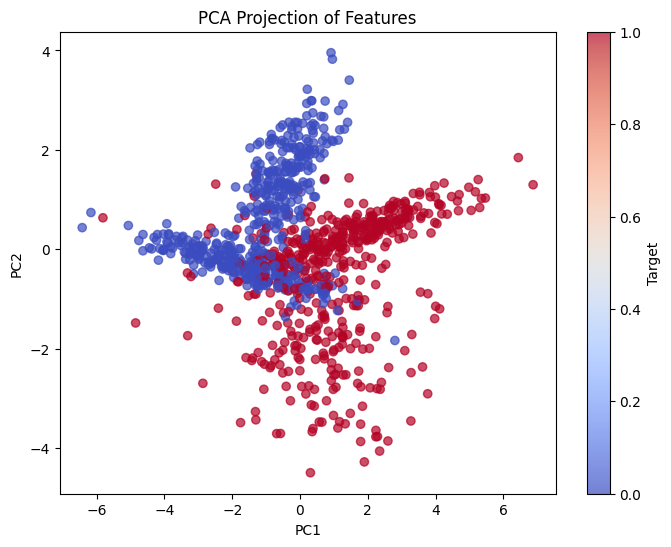

In [16]:
data_characteristics = analyze_linear_separability(df, data_characteristics)

# Assuming you have already visualized the PCA plot
# Manually set linear separability based on your observation
data_characteristics["linear_separability"] = "separable"  # Or "non-separable" or "unknown"



<hr style="border: none; height: 1px; background-color: #ddd;" />

Print the populated dictionary

In [17]:
# from IPython.display import HTML
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# from IPython.display import display, HTML
# import json
# display(HTML(f"<pre style='color:teal; font-size:14px;'>{json.dumps(data_characteristics, indent=4)}</pre>"))
data_characteristics



{'target_variable': {'type': 'binary',
  'imbalance': False,
  'class_imbalance_severity': 'low'},
 'features': {'type': 'continuous',
  'correlation': 'high',
  'outliers': True,
  'missing_data': 0},
 'data_size': {'samples': 1000, 'features': 11},
 'linear_separability': 'separable'}

[Back to the top](#table-of-contents)
___


<a id="data-treatment"></a>

# 🧰 Data Treatment

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

In this section, we apply various **data treatments** to prepare the dataset for model training. The following treatments will be applied:

1. **🛑 Handling Missing Values**
2. **🔧 Feature Engineering**
3. **🏷️ Handling Categorical Data**
4. **⚖️ Scaling the Data**

</details>


<a id="handle-missing-values"></a>

#### 🛑 Handling Missing Values

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

This step handles the **missing values** in the dataset. There are two common approaches:

1. **❌ Dropping Missing Data**:  
   - Rows or columns containing **missing values** (NaN) can be **dropped**.  
   - This is usually done when the missing data is **relatively small**, and dropping it won't result in significant information loss.

2. **💡 Imputing Missing Data**:  
   - For features with missing values, you can **impute** the missing data using techniques such as:
     - **Mean**: For numerical columns, replace missing values with the **mean** of that column.
     - **Median**: For numerical columns, replace missing values with the **median**.
     - **Mode**: For categorical columns, replace missing values with the **most frequent value**.

Imputation helps prevent losing valuable data when missing values are widespread.

**Example**:  
- **Imputation with Mean**: Replace missing values in a numerical column with the **mean** of that column.

</details>


In [18]:
def handle_missing_values(df):
    """
    Handle missing values in the dataset.
    Placeholder: Decide whether to impute or drop rows/columns with missing data.
    """
    # Placeholder - Example of handling missing data
    # df = df.dropna()  # Drop rows with missing values
    # OR
    # df['column_name'] = df['column_name'].fillna(df['column_name'].mean())  # Impute missing values with mean
    pass


<a id="feature-engineering"></a>

#### 🔧 Feature Engineering

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

Feature engineering involves creating new features or modifying existing features to improve the model’s performance. Here are some common techniques:

1. **🔄 Interaction Features**:  
   - Combine existing features to create **interaction features**. For example, multiplying two features may capture a relationship between them.

2. **📅 Temporal Features**:  
   - Convert date/time data into features like **year**, **month**, or **day of the week** to help models use temporal patterns.

3. **⚖️ Aggregated Features**:  
   - Create aggregated features, such as the **mean** or **sum** of several columns, to reduce noise or create summary features.

Example:  
- **Creating Interaction Features**: Multiply two features to create a new feature that represents the interaction between them.

</details>


In [19]:
def feature_engineering(df):
    """
    Perform feature engineering to create or modify features in the dataset.
    Placeholder: Create new features or transform existing features based on insights.
    """
    # Placeholder - Example of feature engineering
    # df['new_feature'] = df['feature1'] * df['feature2']  # Create a new feature
    pass


<a id="handle-categorical-data"></a>

#### 🏷️ Handling Categorical Data

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

This step handles the **categorical data** in the dataset. Machine learning algorithms require numerical data, so categorical variables need to be converted into numeric values. Common encoding techniques include:

1. **🔢 One-Hot Encoding**:  
   - Each category in a categorical feature is transformed into **binary columns** (1 or 0), representing the presence or absence of each category.

2. **🏷️ Label Encoding**:  
   - Assign a unique **numeric label** to each category in a categorical feature. This method is useful for **ordinal** features, where the order matters (e.g., low, medium, high).

Example:  
- **One-Hot Encoding**: Convert categorical values into binary columns, one for each category.

</details>


In [20]:
def handle_categorical_data(df):
    """
    Handle categorical data in the dataset.
    Placeholder: Apply encoding techniques like One-Hot Encoding or Label Encoding.
    """
    # Placeholder - Example of handling categorical data
    # df = pd.get_dummies(df, columns=['categorical_column'])  # One-Hot Encoding
    # OR
    # from sklearn.preprocessing import LabelEncoder
    # le = LabelEncoder()
    # df['encoded_column'] = le.fit_transform(df['categorical_column'])  # Label Encoding
    pass


<a id="scale-data"></a>

#### ⚖️ Scaling the Data

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

Scaling is important for algorithms that are sensitive to the magnitude of features, like **SVM**, **KNN**, and **Logistic Regression**. There are two main scaling methods:

1. **📏 Standardization (Z-score Scaling)**:  
   - This transforms the data so that each feature has a **mean of 0** and a **standard deviation of 1**. This is useful when features have different scales.

2. **🌍 Normalization**:  
   - This transforms the data to fit within a fixed range, typically **0 to 1**, and is useful when features have different units or scales.

Example:  
- **Standardization**: Standardize numerical features so they have a mean of 0 and standard deviation of 1.

</details>


In [21]:
def scale_data(df):
    """
    Scale the numerical features in the dataset.
    Placeholder: Normalize or standardize numerical features if needed.
    """
    # Placeholder - Example of scaling the data
    # from sklearn.preprocessing import StandardScaler
    # scaler = StandardScaler()
    # df[['numerical_column1', 'numerical_column2']] = scaler.fit_transform(df[['numerical_column1', 'numerical_column2']])
    pass


<a id="data-splitting"></a>

# 📊 Data Splitting

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

In this section, we will explore various strategies for **splitting** the data into **training** and **testing** sets. Proper splitting ensures that the model is evaluated correctly and prevents overfitting or biasing from the data.

We will cover the following data splitting techniques:

- **📈 Basic Train-Test Split**: A straightforward 80-20 split.
- **🧑‍🤝‍🧑 Stratified Train-Test Split**: Ensures balanced class distribution.
- **🕰️ Time-series Split**: Respects the temporal order for time-series data.
- **🔄 K-Fold Cross-Validation**: A more robust evaluation technique.

</details>


<a id="basic-train-test-split"></a>

#### 📈 Basic Train-Test Split

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

The **basic train-test split** is the simplest method, where the dataset is divided into two parts: 80% for training and 20% for testing. This basic split helps evaluate model performance but may not always work well for imbalanced or time-series data.

</details>


In [ ]:
def basic_train_test_split(df, target_column, test_size=0.2, random_state=42):
    """
    Perform a basic train-test split (80-20 by default) on the dataset.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - target_column: The column name representing the target variable.
    - test_size: The proportion of the dataset to include in the test split (default 0.2).
    - random_state: Controls the randomness of the train-test split (default 42).
    
    Returns:
    - X_train: Training data features.
    - X_test: Test data features.
    - y_train: Training data target.
    - y_test: Test data target.
    """
    # Features and target variables
    X = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target variable
    
    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test


<a id="stratified-train-test-split"></a>

#### 🧑‍🤝‍🧑 Stratified Train-Test Split

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

For imbalanced datasets, it's crucial to keep the class distribution similar in both the **training** and **testing** sets. A **stratified split** ensures that each set has the same proportions of classes as the original dataset.

</details>


In [ ]:
def stratified_train_test_split(df, target_column, test_size=0.2, random_state=42):
    """
    Perform a stratified train-test split to maintain class distribution.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - target_column: The column name representing the target variable.
    - test_size: The proportion of the dataset to include in the test split (default 0.2).
    - random_state: Controls the randomness of the train-test split (default 42).
    
    Returns:
    - X_train: Training data features.
    - X_test: Test data features.
    - y_train: Training data target.
    - y_test: Test data target.
    """
    # Features and target variables
    X = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target variable
    
    # Perform the stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)
    
    return X_train, X_test, y_train, y_test


<a id="time-series-split"></a>

#### 🕰️ Time-series Split

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

For **time-series data**, we need to respect the temporal order. This means that the model should always be trained on data from the **past** and tested on data from the **future**. Using a **time-series split** prevents the model from having access to future data during training.

</details>


In [ ]:
def time_series_split(df, target_column, n_splits=5):
    """
    Perform a time-series split, ensuring the model is trained on past data and tested on future data.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - target_column: The column name representing the target variable.
    - n_splits: The number of splits (default 5).
    
    Returns:
    - X_train, X_test, y_train, y_test for each fold in the time-series split.
    """
    # Features and target variables
    X = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target variable
    
    # Sort the data by date (ensure the data is sorted chronologically before splitting)
    df = df.sort_values('date_column')  # Assuming there is a 'date_column' to sort by
    
    # Initialize TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        print(f"Train samples: {len(X_train)} | Test samples: {len(X_test)}")
    
    return X_train, X_test, y_train, y_test


<a id="k-fold-cross-validation"></a>

#### 🔄 K-Fold Cross-Validation

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

In **K-fold cross-validation**, the data is split into **K** equal-sized folds. The model is trained **K times**, each time using a different fold as the test set and the remaining folds as the training set. This technique provides a more robust estimate of model performance by evaluating it on different portions of the data.

</details>


In [ ]:
def k_fold_cross_validation(df, target_column, n_splits=5):
    """
    Perform K-Fold Cross-Validation on the dataset.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - target_column: The column name representing the target variable.
    - n_splits: The number of splits (default 5).
    
    Returns:
    - X_train, X_test, y_train, y_test for each fold in the cross-validation.
    """
    # Features and target variables
    X = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target variable
    
    # Initialize KFold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        print(f"Train samples: {len(X_train)} | Test samples: {len(X_test)}")
    
    return X_train, X_test, y_train, y_test


<a id="data-leakage"></a>

#### 🚨 Handling Data Leakage

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

**Data leakage** happens when the model inadvertently gets access to information it wouldn't have in a real-world scenario, such as future data or features derived from the target variable. This results in overly optimistic performance metrics.

We need to ensure that the data split respects temporal and feature constraints to prevent leakage.

</details>


In [26]:
def check_for_data_leakage(df, target_column):
    """
    Function to check for potential data leakage in the dataset.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - target_column: The column name representing the target variable.
    """
    # Placeholder logic to check for potential data leakage
    pass


In [27]:
X_train, X_test, y_train, y_test = basic_train_test_split(df, target_column='Target')


<a id="baseline-model"></a>

# 🧪 Baseline Model
<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

In this section, we define the **baseline model** for the classification task. The baseline model is typically a **dummy model** that can be used to compare against more sophisticated models. Here, we use the **DummyClassifier**, which predicts the majority class, to set a baseline performance.

The baseline model will help us assess if more advanced models (e.g., Random Forest, SVM) are making meaningful improvements over a simple strategy.

</details>


<a id="dummy-classifier"></a>

#### 📈 Dummy Classifier

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

In this step, we train a **Dummy Classifier** using the **majority class strategy**, where the model always predicts the most frequent class in the dataset.

- **Strategy**: The Dummy Classifier uses the **'most_frequent'** strategy to predict the majority class for every observation.
- This serves as our **baseline model** for comparison.

By using this model, we can gauge the **minimum performance** we should expect from any more complex model. If an advanced model does not outperform this baseline, it likely indicates that the model is not capturing meaningful patterns in the data.

</details>


In [ ]:
def dummy_classifier_baseline(X_train, y_train, X_test, y_test):
    """
    Dummy classifier predicting the majority class as the baseline.
    """
    # Initialize the Dummy Classifier to predict the most frequent class
    baseline_model = DummyClassifier(strategy='most_frequent', random_state=42)
    
    # Fit the model on training data
    baseline_model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = baseline_model.predict(X_test)
    
    # Return predictions for evaluation
    return y_pred


In [34]:
y_pred = dummy_classifier_baseline(X_train, y_train, X_test, y_test)

# # 3. Evaluate the baseline model's performance
# accuracy = accuracy_score(y_test, y_pred)
# clf_report = classification_report(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

# # 4. Print the evaluation metrics
# print(f"Baseline Model Accuracy: {accuracy:.4f}")
# print("\nClassification Report:\n", clf_report)
# print("Confusion Matrix:\n", conf_matrix)

<a id="baseline-metrics"></a>

#### 📊 Metrics to Benchmark

<details><summary><strong>📖 Click to Expand Explanation</strong></summary>

After training the baseline model, we evaluate its performance using key classification metrics:

1. **Accuracy**: Measures the proportion of correct predictions out of the total predictions.
   
2. **Classification Report**: Includes metrics like:
   - **Precision**: The percentage of relevant instances among the retrieved instances.
   - **Recall**: The percentage of relevant instances that have been retrieved.
   - **F1-Score**: The harmonic mean of precision and recall.

3. **Confusion Matrix**: Provides a detailed breakdown of the **True Positives**, **True Negatives**, **False Positives**, and **False Negatives** to understand where the model is making errors.

These metrics provide a **benchmark** for evaluating more advanced models. Any model you train later should outperform the baseline model on these metrics to demonstrate its effectiveness.

</details>


In [35]:
def evaluate_baseline_model(y_test, y_pred):
    """
    Evaluate the baseline model using key classification metrics.
    """
    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Classification Report (Precision, Recall, F1-Score)
    clf_report = classification_report(y_test, y_pred)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print all evaluation metrics
    print(f"Baseline Model Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", clf_report)
    print("Confusion Matrix:\n", conf_matrix)


In [37]:
evaluate_baseline_model(y_test, y_pred)


Baseline Model Accuracy: 0.4450

Classification Report:
               precision    recall  f1-score   support

           0       0.45      1.00      0.62        89
           1       0.00      0.00      0.00       111

    accuracy                           0.45       200
   macro avg       0.22      0.50      0.31       200
weighted avg       0.20      0.45      0.27       200

Confusion Matrix:
 [[ 89   0]
 [111   0]]


/Users/ar/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ar/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ar/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
